# Hypothesis testing problem

### **Exercise 1**

#### ANOVA

Suppose that a study wants to check if there is a significant difference between the goal averages of soccer players depending on the position in which they play. In case there is a difference, you want to know which positions differ from the rest.

NOTE: You must replace the values <<<FIXME>>>.

**Exercise: Load data from "datos_laliga.csv". It contains a sample of randomly selected players.**

In [24]:
import pandas as pd
import numpy as np
my_data = pd.read_csv('assets/datos_laliga.csv', sep=',')
my_data

,id_player,position,average
0,id_189,DC,0.310
1,id_85,DC,0.306
2,id_105,DC,0.320
3,id_34,DC,0.329
4,id_32,DC,0.369
...,...,...,...
322,id_231,DC,0.381
323,id_20,MP,0.310
324,id_294,DC,0.340
325,id_218,DC,0.305


In [25]:
my_data.describe()

,average
count,327.000000
mean,0.332159
std,0.035702
min,0.174000
25%,0.309000
50%,0.331000
75%,0.354500
max,0.437000


In [26]:
my_data.dtypes

id_player     object
position      object
average      float64
dtype: object

**Exercise: Identify the number of groups and number of observations per group to determine if it is a balanced model. The mean and standard deviation of the group are also calculated.**

In [27]:
pd.crosstab(my_data["position"], my_data["position"], margins=True, margins_name="Total")

position,DC,MO,MP,P,Total
position,,,,,
DC,154,0,0,0,154
MO,0,14,0,0,14
MP,0,0,120,0,120
P,0,0,0,39,39
Total,154,14,120,39,327


In [28]:
pd.crosstab(my_data["position"],my_data["position"], margins=True, margins_name="Mean", values=my_data['average'], aggfunc=np.mean)


position,DC,MO,MP,P,Mean
position,,,,,
DC,0.331526,NaN,NaN,NaN,0.331526
MO,NaN,0.347786,NaN,NaN,0.347786
MP,NaN,NaN,0.33425,NaN,0.334250
P,NaN,NaN,NaN,0.322615,0.322615
Mean,0.331526,0.347786,0.33425,0.322615,0.332159


In [5]:
pd.crosstab(my_data["position"],my_data["position"], margins=True, margins_name="STD", values=my_data['average'], aggfunc=np.std)

position,DC,MO,MP,P,STD
position,,,,,
DC,0.037095,NaN,NaN,NaN,0.037095
MO,NaN,0.036037,NaN,NaN,0.036037
MP,NaN,NaN,0.029444,NaN,0.029444
P,NaN,NaN,NaN,0.045132,0.045132
STD,0.037095,0.036037,0.029444,0.045132,0.035648


**Exercise: Calculate the mean and standar deviation by position**

In [6]:
my_data.groupby('position')['average'].agg([ np.mean, np.std])


,mean,std
position,,
DC,0.331526,0.037095
MO,0.347786,0.036037
MP,0.334250,0.029444
P,0.322615,0.045132


**Exercise: Calculate the standard deviation by position**

In [7]:
my_data.groupby('position')['average'].agg([np.std])

,std
position,
DC,0.037095
MO,0.036037
MP,0.029444
P,0.045132


In [8]:
my_data.groupby('position')['average'].agg('std')

position
DC    0.037095
MO    0.036037
MP    0.029444
P     0.045132
Name: average, dtype: float64

In [9]:
my_data.groupby('position')['average'].std()

position
DC    0.037095
MO    0.036037
MP    0.029444
P     0.045132
Name: average, dtype: float64

Since the number of observations per group is not constant, it is an unbalanced model. It is important to take this into account when checking the conditions of normality and homoscedasticity (s1 = s2 = s3 = s4). The most useful graphical representation before performing an ANOVA is the Box-Plot model.

**Exercise: Plot a boxplot for each position**

In [ ]:
%pip install plotnine

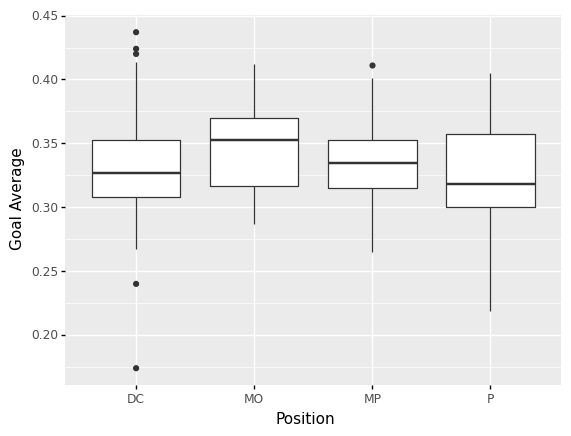

<ggplot: (8731373392731)>

In [31]:
import plotnine
from plotnine import *
p10 = (
    ggplot(my_data, aes("position", "average"))
    + geom_boxplot()
    + xlab("Position")
    + ylab("Goal Average")
)
p10


#### Independence

The total sample size is <10% of the population of all players in the league. The groups (categorical variable) are independent of each other since a random sample of players from the entire league (not just from the same team) has been made.

Normal distribution of observations: The quantitative variable must be distributed in a normal way in each of the groups. The normality study can be done graphically (qqplot) or with a hypothesis test.

**Exercise: Make an analysis about normal distribution for each position**

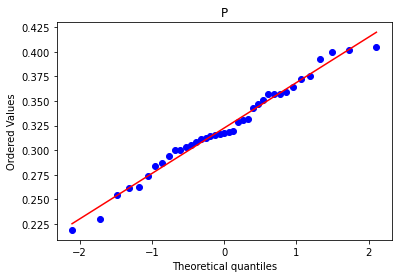

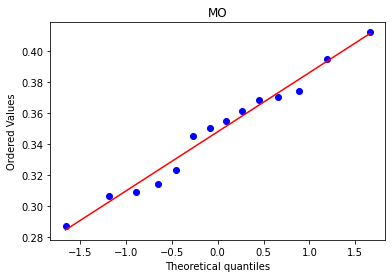

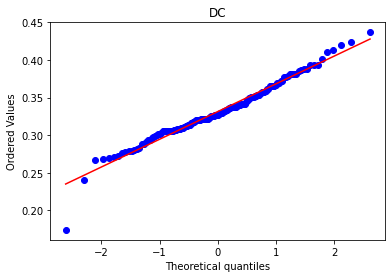

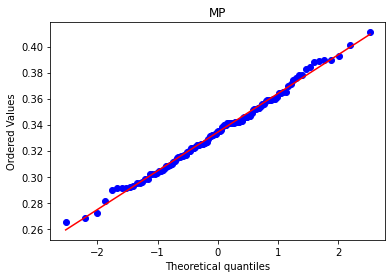

In [32]:
import numpy as np 
import pylab 
import matplotlib.pyplot as plt
import scipy.stats as stats

measurements = my_data.loc[my_data["position"] == "P","average"]
stats.probplot(measurements, dist="norm", plot=pylab)
plt.title("P")
plt.show()

measurements = my_data.loc[my_data["position"] == "MO","average"]
stats.probplot(measurements, dist="norm", plot=pylab)
plt.title("MO")
plt.show()

measurements = my_data.loc[my_data["position"] == "DC","average"]
stats.probplot(measurements, dist="norm", plot=pylab)
plt.title("DC")
plt.show()

measurements = my_data.loc[my_data["position"] == "MP","average"]
stats.probplot(measurements, dist="norm", plot=pylab)
plt.title("MP")
plt.show()

**Exercise: make the boxplot for each position, what you can say about them?**

In [ ]:
%pip install plotly

In [34]:
# Using plotly
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(y=my_data.loc[my_data["position"] == "DC","average"], name="DC"))
fig.add_trace(go.Box(y=my_data.loc[my_data["position"] == "MO","average"], name="MO"))
fig.add_trace(go.Box(y=my_data.loc[my_data["position"] == "MP","average"], name="MP"))
fig.add_trace(go.Box(y=my_data.loc[my_data["position"] == "P","average"], name="P"))

fig.update_layout({
    'xaxis': {
        'title_text': "Position",
    },
    'yaxis': {
        'title_text': "Goal average",
    },
    })



                
fig.show()

**Exercise: Use the Kolmogorov-Smirnov test or with or without the Lilliefors correction in order to know the normality distribution.**

In [35]:
# Beginner way to do it

from statsmodels.stats.diagnostic import lilliefors

my_df = pd.DataFrame(index=np.arange(len(np.unique(my_data["position"]))), columns=["position", "D_statistic", "p_value"])
my_df["position"] = np.unique(my_data["position"])

for position in my_df["position"]:
    my_data_subset = my_data.loc[my_data["position"] == position,:]
    D_statistic, p_value = lilliefors(my_data_subset.average)
    my_df.loc[my_df["position"]==position,["D_statistic", "p_value"]] = D_statistic, p_value
    
print(my_df)

  position D_statistic   p_value
0       DC    0.070653  0.084495
1       MO    0.112049  0.903567
2       MP    0.044082  0.855077
3        P    0.087208  0.634941


In [36]:
#Another way to do it (Highly recommendable)
my_data.groupby("position")["average"].apply(lilliefors)

position
DC    (0.07065325441241377, 0.08449497937163018)
MO     (0.11204872375044372, 0.9035667916170158)
MP    (0.044082291017247144, 0.8550765299661607)
P      (0.08720833565943192, 0.6349406883319556)
Name: average, dtype: object

p-value mayor que nivel de significancia por lo que no hay evidencia siginificativa para rechazar H0. No hay evidencia de que los datos no presenten una distribucion normal.

The hypothesis tests do not show evidence of a lack of normality.

Constant variance between groups (homoscedasticity):

Given that there is a group (DC) that is at the limit to accept that it is distributed in a normal way, the Fisher and Bartlett tests are not recommended. Instead it is better to use a test based on the median Levene test or the Fligner-Killeen test.

**Exercise: use the fligner and levene functions from scipy.stats in order to know the homocedasticy**

In [37]:
from scipy import stats

values_array = pd.DataFrame(my_data.groupby("position")["average"]).to_numpy()

print(stats.fligner(values_array[0,1], values_array[1,1], values_array[2,1], values_array[3,1]))

print(stats.levene(values_array[0,1], values_array[1,1], values_array[2,1], values_array[3,1]))


FlignerResult(statistic=6.97244018401731, pvalue=0.07278140457833458)
LeveneResult(statistic=2.6056585191080566, pvalue=0.051799415350941756)


Fligner: it checks for homogeneity of variance, but is a better option when data are non-normally distributed or when problems related to outliers in the dataset cannot be resolved.
Levene: it checks for homogeneity of variance, but is a better option when data are normally distributed.
p-value mayor que nivel de significancia por lo que no hay evidencia siginificativa para rechazar H0. No hay evidencia de que los datos no presenten una homogenidad de varianzas.

There is no significant evidence of lack of homoscedasticity in either of the two tests.

The study of the conditions can be carried out after calculating the ANOVA, since if they are not fulfilled, it does not make much sense to continue. However, the most appropriate way to verify that the necessary conditions are satisfied is by studying the model residuals once the ANOVA has been generated.

**Exercise: make an ANOVA table and analyze the p-value using the packages statsmodels and the bioinfokit**

In [ ]:
%pip install statsmodels

In [39]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('average ~ position', data=my_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
position,0.007557,3.0,1.994349,0.114693
Residual,0.407984,323.0,NaN,NaN


In [ ]:
%pip install bioinfokit

In [41]:
# ANOVA with package bioinfokit
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=my_data, res_var='value', anova_model='average ~ position')
res.anova_summary
# output (ANOVA F and p value)

,df,sum_sq,mean_sq,F,PR(>F)
position,3.0,0.007557,0.002519,1.994349,0.114693
Residual,323.0,0.407984,0.001263,NaN,NaN


This means we don’t have sufficient evidence to say that there is a statistically significant difference between the group means

**Exercise: make a plot of the fitted values vs residuals. Make the plot of the Standardized Residuals. Make the histogram of the residuals.**

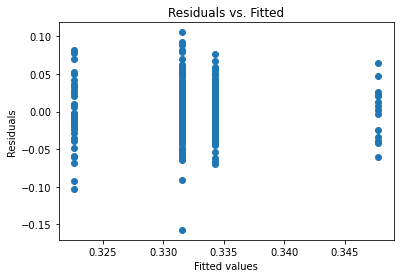

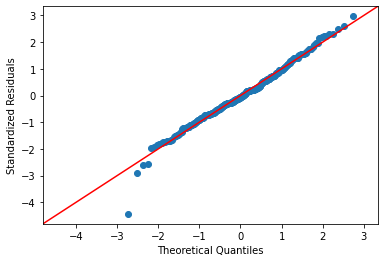

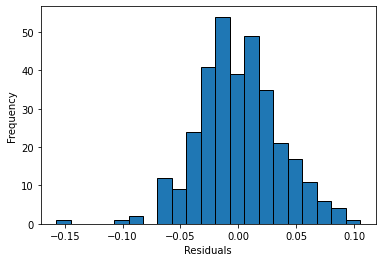

In [42]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt


plt.scatter(res.anova_model_out.fittedvalues, res.anova_model_out.resid)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted")
plt.show()

# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

Given that the p-value is higher than 0.05, there is not enough evidence to consider that at least two means are different. The graphical representation of the residuals does not show lack of homoscedasticity (graph 1) and in the qqplot the residuals are distributed very close to the normal line (graph 2 and 3).

### **Exercise 2**

#### T-TEST INDEPENDENT

A professor gives online lectures. Later, he uploads recorded lectures to the cloud for students who followed the course asynchronously (those who did not attend the lesson but later watched the records). However, he believes that the students who attend class at the class time and participate in the process are more successful. Therefore, he recorded the average grades of the students at the end of the semester. The data is below.

```py
synchronous = [94. , 84.9, 82.6, 69.5, 80.1, 79.6, 81.4, 77.8, 81.7, 78.8, 73.2, 87.9, 87.9, 93.5, 82.3, 79.3, 78.3, 71.6, 88.6, 74.6, 74.1, 80.6]


asynchronous = [77.1, 71.7, 91. , 72.2, 74.8, 85.1, 67.6, 69.9, 75.3, 71.7, 65.7, 72.6, 71.5, 78.2]
```

Conduct the hypothesis testing to check whether the professor’s belief is statistically significant by using a 0.05 significance level to evaluate the null and alternative hypotheses. Before doing hypothesis testing, check the related assumptions. Comment on the results.

**1. Defining Hypothesis**

H₀: μₛ≤μₐ

H₁: μₛ>μₐ

**2. Assumption Check**

H₀: The data is normally distributed.

H₁: The data is not normally distributed.

Assume that α=0.05. If the p-value is >0.05, it can be said that data is normally distributed.

In [12]:
import numpy as np
from scipy import stats
import pandas as pd

In [15]:
sync = np.array([94. , 84.9, 82.6, 69.5, 80.1, 79.6, 81.4, 77.8, 81.7, 78.8, 73.2,
       87.9, 87.9, 93.5, 82.3, 79.3, 78.3, 71.6, 88.6, 74.6, 74.1, 80.6])
asyncr = np.array([77.1, 71.7, 91. , 72.2, 74.8, 85.1, 67.6, 69.9, 75.3, 71.7, 65.7, 72.6, 71.5, 78.2])

In [16]:
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")    

In [17]:
check_normality(sync)
check_normality(asyncr)

p value:0.6556
Fail to reject null hypothesis >> The data is normally distributed
p value:0.0803
Fail to reject null hypothesis >> The data is normally distributed


H₀: The variances of the samples are the same.

H₁: The variances of the samples are different.

In [18]:
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")


In [19]:
check_variance_homogeneity(sync, asyncr)

p value:0.8149
Fail to reject null hypothesis >> The variances of the samples are same.


It tests the null hypothesis that the population variances are equal (called homogeneity of variance or homoscedasticity). Suppose the resulting p-value of Levene’s test is less than the significance level (typically 0.05). In that case, the obtained differences in sample variances are unlikely to have occurred based on random sampling from a population with equal variances.

In [20]:
#perform the parametric version of the test for 2 groups and unpaired data.
ttest,p_value = stats.ttest_ind(sync,asyncr)
print("p value:%.8f" % p_value)
print("since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:%.4f" %(p_value/2))
if p_value/2 <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:0.00753598
since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:0.0038
Reject null hypothesis


Make a conclusion

Use p-value/2 porque es de dos colas.
En este caso si hay evidencia significativa de los dos grupos en estudio. 